In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from modules import *

In [3]:
path = "../data/lineas_completas/REG804.json"

with open(path, 'r') as archivo:
    data = json.load(archivo)
    
print(len(data))

# Desplegamos la estructura de datos para un elemento (listas, diccionaros, n elementos...)
element = data[10]
print_element(element)

155

OBJECTID_VANO_2D: 15

ID_VANO: G_13578475_13578503

LONGITUD_2D: 161.88580930816013

COORDENADA_X_INICIO: 119680.86639999971

COORDENADA_Y_INICIO: 4695388.431299999

COORDENADA_X_FIN: 119842.54320000019

COORDEANDA_Y_FIN: 4695380.207699999

APOYOS: 
- Length of list: 2
    OBJECTID_APOYO_3D: 157
    COD_APOYO: 13578503
    COORDENADA_X: 119680.86639999971
    COORDEANDA_Y: 4695388.431299999
    COORDENADAS_Z: [923.9784999999974, 930.0492999999988]
    - Length of list: 2

CONDUCTORES: 
- Length of list: 3
    OBJECTID_VANO_3D: 631
    LONGITUD_2D: 161.62690508919917
    LONGITUD_3D: 163.754105368576
    VERTICES: [[119842.52759999968, 4695381.5911, 957.5022999999928], [119833.55910000019, 4695382.0328, 955.4238000000041], [119824.59080000035, 4695382.476199999, 953.4251999999979], [119815.62249999959, 4695382.9213, 951.5065000000031], [119806.65429999959, 4695383.368000001, 949.6674999999959], [119797.68620000035, 4695383.816400001, 947.9079999999958], [119788.7182, 4695384.2664, 

In [157]:
cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, 0)

In [4]:
all_extremos = []

for i in range(len(data)):
    
    try:
        cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
    except:
        print_element(data[i])
    
    all_extremos.append(extremos_values)

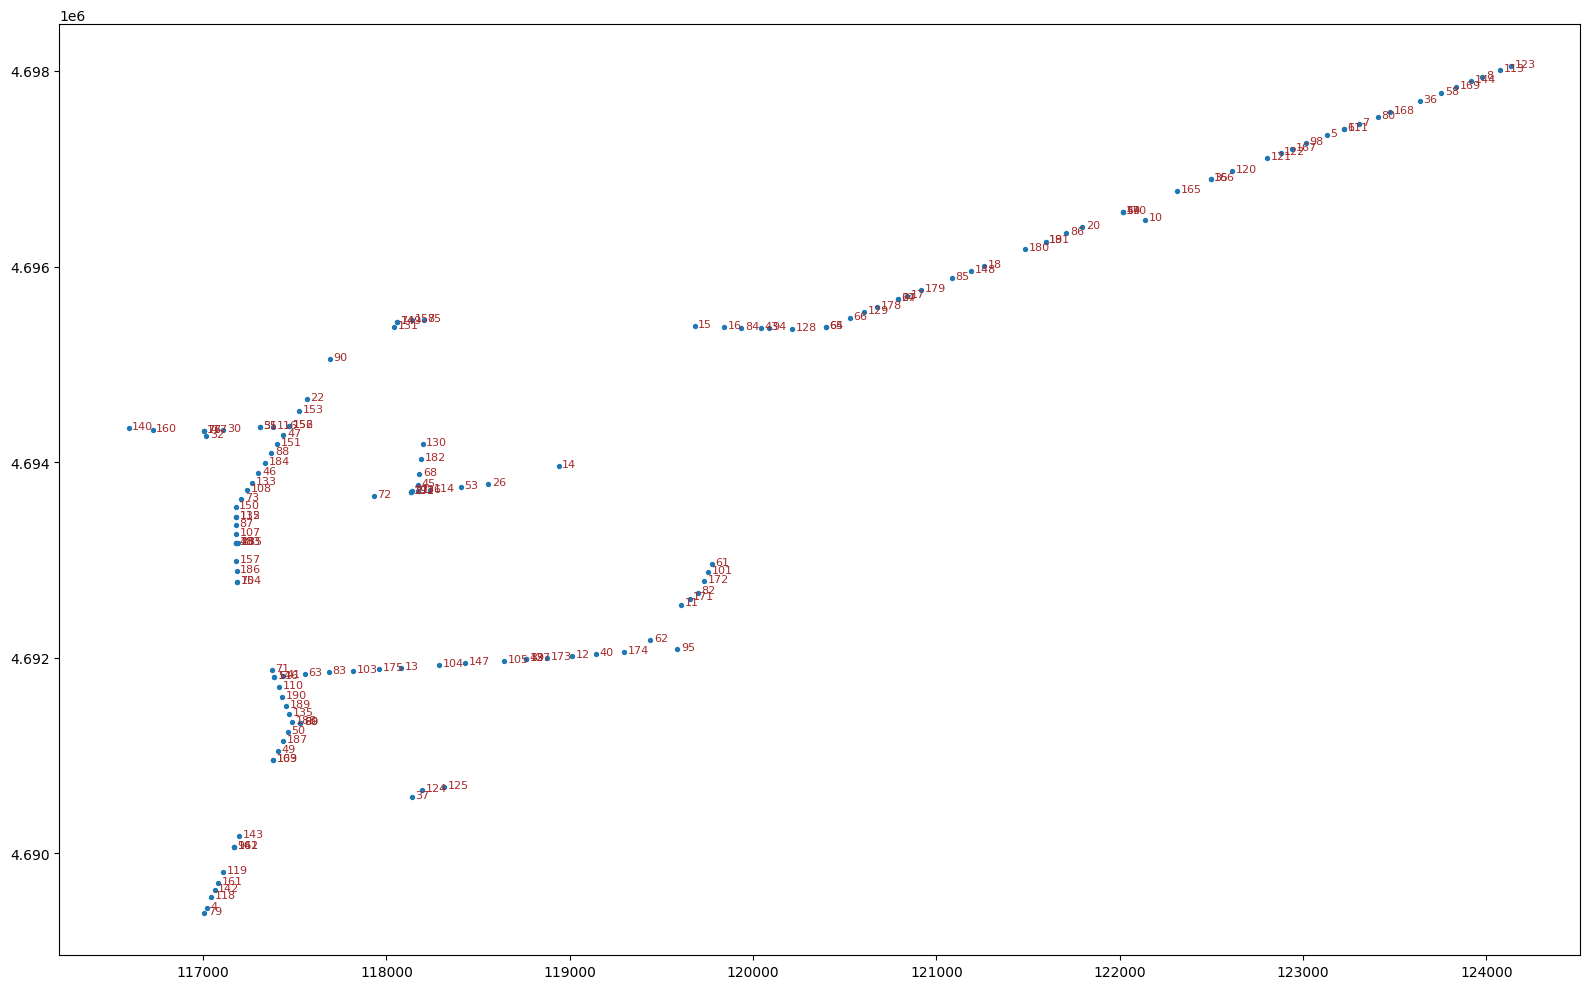

In [5]:
first_extremos = []
last_extremos = []

plt.figure(figsize=(16,10))

for i in range(len(all_extremos)):
    first_extremos.append(np.array([all_extremos[i][0][0], all_extremos[i][1][0], all_extremos[i][2][0]]))
    # last_extremos.append(np.array([all_extremos[i][0][2], all_extremos[i][1][2], all_extremos[i][2][0][1]]))
    
first_extremos = np.array(first_extremos)
# last_extremos = np.array(last_extremos)

plt.scatter(first_extremos[:,0], first_extremos[:,1], s = 8)
# plt.scatter(last_extremos[:,0], last_extremos[:,1], s = 3)

for i in range(len(all_extremos)):
    plt.text(first_extremos[i,0]+20, first_extremos[i,1]-10, s = str(data[i]["OBJECTID_VANO_2D"]), size = 8, color = "brown")

plt.tight_layout()

In [160]:
# parejas = []
# parejas_ids = []

# for j in range(len(data)):
#     _, _, _, extremos_values0 = extract_vano_values(data, j)
#     extremos_set0 = set([extremos_values0[0][0], extremos_values0[1][0]])

#     for i in range(j + 1, len(data)):
#         _, _, _, extremos_values = extract_vano_values(data, i)
#         extremos_set = set([extremos_values[0][0], extremos_values[1][0]])
        
#         # Check for any intersection between the two sets
#         if extremos_set0.intersection(extremos_set):
#             print(i, j)
#             parejas.append((i, j))
#             parejas_ids.append((data[i]["ID_VANO"], data[j]["ID_VANO"]))


In [146]:
parejas = []
parejas_ids = []


for j in range(len(data)):

    _, _, _, extremos_values0 = extract_vano_values(data, j)

    for i in range(j,len(data)):
        
        _, _, _, extremos_values = extract_vano_values(data, i)
        
        # cond1 = (extremos_values[0][0] == extremos_values0[0][0])
        # cond2 = (extremos_values[1][0] == extremos_values0[1][0])
        
        # cond3 = (extremos_values[0][0] == extremos_values0[1][0])
        # cond4 = (extremos_values[1][0] == extremos_values0[0][0])
        
                
        if i != j:
            
            if len(extremos_values0) == 0:
                print(f"El vano {j} solo tiene 1 apoyo")
                
            if len(extremos_values) == 0:
                print(f"El vano {i} solo tiene 1 apoyo")
                
            break_loops = False
            
            for k in range(np.array(extremos_values0).shape[1]):
                for h in range(np.array(extremos_values).shape[1]):
                    # print(extremos_values)
                    if (np.array(extremos_values0)[:,k] == np.array(extremos_values)[:,h]).all():
                        
                        print(i, j)
                        parejas.append((i,j))
                        parejas_ids.append((data[i]["ID_VANO"], data[j]["ID_VANO"]))
                        break_loops = True
                        break
                    
                if break_loops:
                    break
                    

62 0
91 0
2 1
75 1
85 1
3 2
85 2
63 3
86 4
112 4
134 5
135 6
29 7
137 7
79 8
139 8
11 10
66 11
52 12
141 12
115 13
142 14
143 14
33 15
68 15
34 16
154 16
120 17
37 18
123 18
145 18
52 19
140 19
41 20
56 21
153 21
154 21
23 22
60 22
42 23
61 24
93 25
130 25
43 26
132 26
97 27
31 28
107 28
137 28
138 29
48 30
113 30
80 31
107 31
66 32
72 32
44 33
134 33
53 34
104 35
146 35
118 36
119 36
122 36
145 37
147 37
83 38
149 38
149 39
150 39
55 40
84 40
113 40
87 41
89 42
133 43
134 44
76 45
77 46
65 48
50 49
99 49
51 50
100 51
140 52
144 53
121 54
148 54
82 57
117 57
116 58
124 58
124 59
61 60
90 60
90 61
132 63
135 64
136 64
78 65
115 67
141 67
143 68
81 69
88 69
103 69
118 70
146 70
99 72
92 74
109 74
127 74
131 75
136 77
139 78
114 79
114 80
145 81
104 82
128 83
113 84
152 84
96 86
106 87
103 88
122 89
125 90
110 91
126 92
94 93
95 94
131 95
98 97
140 100
144 101
116 102
117 103
150 105
151 105
153 106
125 108
127 109
126 110
127 111
133 112
124 116
120 119
122 119
148 123
130 129
152 151
15

In [8]:
len(parejas), len(np.array(parejas).flatten())

(152, 304)

In [9]:
conjunto = set(np.array(parejas).flatten())
flat_data = np.array(parejas).flatten()

In [10]:
# Encontrar los vanos que no conectan = discontinuidades
aislados = []
aislados_ids = []

for i in range(len(data)):
    
    if i not in conjunto:
        print(f"Aislado: {i}")
        
        aislados.append(i)
        aislados_ids.append(data[i]["ID_VANO"])

Aislado: 9
Aislado: 47
Aislado: 71
Aislado: 73


In [11]:
# Encontrar los vanos que aparecen 2 veces = tenemos los dos apoyos
completos = []
incompletos = []

completos_ids = []
incompletos_ids = []

for i in range(len(data)):
    
    if i in flat_data:
        if sum(i == flat_data) > 1:
            print(f"Completo: {i}")
            completos.append(i)
            completos_ids.append(data[i]["ID_VANO"])
        else:
            print(f"Incompleto: {i}")
            incompletos.append(i)
            incompletos_ids.append(data[i]["ID_VANO"])

Completo: 0
Completo: 1
Completo: 2
Completo: 3
Completo: 4
Incompleto: 5
Incompleto: 6
Completo: 7
Completo: 8
Incompleto: 10
Completo: 11
Completo: 12
Incompleto: 13
Completo: 14
Completo: 15
Completo: 16
Incompleto: 17
Completo: 18
Completo: 19
Incompleto: 20
Completo: 21
Completo: 22
Completo: 23
Incompleto: 24
Completo: 25
Completo: 26
Incompleto: 27
Completo: 28
Completo: 29
Completo: 30
Completo: 31
Completo: 32
Completo: 33
Completo: 34
Completo: 35
Completo: 36
Completo: 37
Completo: 38
Completo: 39
Completo: 40
Completo: 41
Completo: 42
Completo: 43
Completo: 44
Incompleto: 45
Incompleto: 46
Completo: 48
Completo: 49
Completo: 50
Completo: 51
Completo: 52
Completo: 53
Completo: 54
Incompleto: 55
Incompleto: 56
Completo: 57
Completo: 58
Incompleto: 59
Completo: 60
Completo: 61
Incompleto: 62
Completo: 63
Completo: 64
Completo: 65
Completo: 66
Completo: 67
Completo: 68
Completo: 69
Completo: 70
Completo: 72
Completo: 74
Completo: 75
Incompleto: 76
Completo: 77
Completo: 78
Comp

In [12]:
# Conjuntos totalmente independientes

print(f"Vanos completos: {completos}")
print(f"Vanos incompletos: {incompletos}")
print(f"Vanos aislados: {aislados}")

print(f"Parejas que comparten apoyo{parejas}")

Vanos completos: [0, 1, 2, 3, 4, 7, 8, 11, 12, 14, 15, 16, 18, 19, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53, 54, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 103, 104, 105, 106, 107, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154]
Vanos incompletos: [5, 6, 10, 13, 17, 20, 24, 27, 45, 46, 55, 56, 59, 62, 76, 96, 98, 101, 102, 108, 111, 121, 128, 129, 138, 142, 147]
Vanos aislados: [9, 47, 71, 73]
Parejas que comparten apoyo[(62, 0), (91, 0), (2, 1), (75, 1), (85, 1), (3, 2), (85, 2), (63, 3), (86, 4), (112, 4), (134, 5), (135, 6), (29, 7), (137, 7), (79, 8), (139, 8), (11, 10), (66, 11), (52, 12), (141, 12), (115, 13), (142, 14), (143, 14), (33, 15), (68, 15), (34, 16), (

In [17]:
print(f"{100*len(completos)/len(data)}% de vanos completos")
print(f"{100*len(incompletos)/len(data)}% de vanos incompletos")
print(f"{100*len(aislados)/len(data)}% de vanos aislados")

80.0% de vanos completos
17.419354838709676% de vanos incompletos
2.5806451612903225% de vanos aislados


In [20]:
_, apoyo_values0, _, extremos_values0 = extract_vano_values(data, parejas[1][0])
_, apoyo_values1, _, extremos_values1 = extract_vano_values(data, parejas[1][1])

extremos_values0, extremos_values1

([array([117045.151 , 117045.151 , 117062.2088, 117062.2088]),
  array([4689550.816 , 4689550.816 , 4689622.5798, 4689622.5798]),
  array([542.3611, 554.4915, 543.0632, 553.1132])],
 [array([117018.9057, 117018.9057, 117045.151 , 117045.151 ]),
  array([4689441.2102, 4689441.2102, 4689550.816 , 4689550.816 ]),
  array([547.8001, 558.4423, 542.3611, 554.4915])])


Processing vano 0
Distance between mean points: 113.38800673699025

Processing vano 1
Distance between mean points: 111.44286061456818

Processing vano 2
Distance between mean points: 99.83247933962397

Processing vano 3
Distance between mean points: 126.40384142419535

Processing vano 4
Distance between mean points: 122.59339599000718

Processing vano 5
Distance between mean points: 110.18481151977127

Processing vano 6
Distance between mean points: 76.56452907017562

Processing vano 7
Distance between mean points: 130.4980142429612

Processing vano 8
Distance between mean points: 210.2700097944709

Processing vano 9
Distance between mean points: 222.06800642207068

Processing vano 10
Distance between mean points: 164.2093309325779

Processing vano 11
Distance between mean points: 99.53477297978759

Processing vano 12
Distance between mean points: 95.75936638380405

Processing vano 13
Distance between mean points: 97.69968420113601

Processing vano 14
Distance between mean points: 13

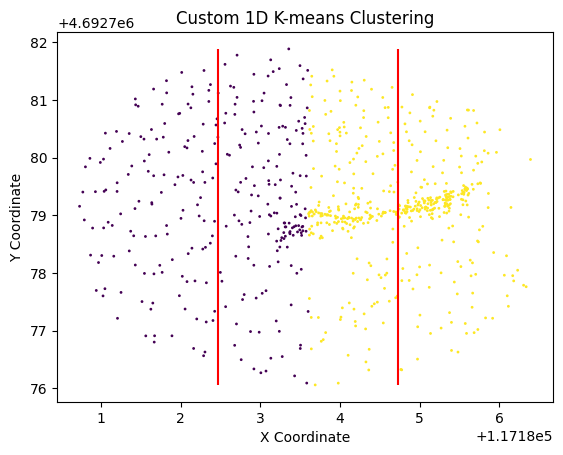


Processing vano 122
Distance between mean points: 27.74039298367319
Invertir coordenadas

Processing vano 123
Distance between mean points: 94.19152824941827

Processing vano 124
Distance between mean points: 83.42356482360687

Processing vano 125
Distance between mean points: 145.76779481268983

Processing vano 126
Distance between mean points: 123.45190047676223

Processing vano 127
Distance between mean points: 112.92821022668262

Processing vano 128
Distance between mean points: 19.916959234180286

Processing vano 129
Distance between mean points: 111.43776220796815

Processing vano 130
Distance between mean points: 110.27732316457858

Processing vano 131
Distance between mean points: 91.10613613884296

Processing vano 132
Distance between mean points: 201.98563262816234

Processing vano 133
Distance between mean points: 96.88145510194819

Processing vano 134
Distance between mean points: 34.264408652073136

Processing vano 135
Distance between mean points: 76.52409603466866

Proc

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Separmos los apoyos lidar
apoyos_separados = dict()

for i in range(len(data)):

    print(f"\nProcessing vano {i}")

    cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
    
    invertedxy = np.zeros((np.array(apoyo_values).shape))

    invertedxy[1,:] = (np.array(apoyo_values))[0,:]
    invertedxy[0,:] = (np.array(apoyo_values))[1,:]
    invertedxy[2,:] = (np.array(apoyo_values))[2,:]
    
    labels, centroids = kmeans_clustering(invertedxy, 2, 100)

    apoyos = []
    extremos = []
    

    for lab in np.unique(labels):

        apoyo = np.array(apoyo_values)[:, labels == lab]

        mean_x = np.mean(apoyo[0,:])
        mean_y = np.mean(apoyo[1,:])
        mean_z = np.mean(apoyo[2,:])
        
        c_mass = np.array([mean_x, mean_y, mean_z])
        extremos.append(c_mass)
        apoyos.append(apoyo)


    dist = np.linalg.norm(np.array(extremos)[0,:] - np.array(extremos)[1,:])
    extremos = np.array(extremos).T
    apoyos_separados[i] = apoyos

    print(f"Distance between mean points: {dist}")

    if 100*abs(dist - data[i]["LONGITUD_2D"])/data[i]["LONGITUD_2D"] > 10.0:
        
        points = np.array(apoyo_values)
        
        labels, centroids = kmeans_clustering(points, 2, 100)
            
        apoyos = []
        extremos = []

        for lab in np.unique(labels):

            apoyo = np.array(apoyo_values)[:, labels == lab]

            mean_x = np.mean(apoyo[0,:])
            mean_y = np.mean(apoyo[1,:])
            mean_z = np.mean(apoyo[2,:])
            
            c_mass = np.array([mean_x, mean_y, mean_z])
            extremos.append(c_mass)
            apoyos.append(apoyo)
        
        print("Invertir coordenadas")
        
        dist = np.linalg.norm(np.array(extremos)[0,:] - np.array(extremos)[1,:])
        extremos = np.array(extremos).T
        apoyos_separados[i] = apoyos
        
        if 100*abs(dist - data[i]["LONGITUD_2D"])/data[i]["LONGITUD_2D"] > 10.0:
            
            print(f"Proportional absolut error of distance = {100*abs(dist - data[i]['LONGITUD_2D'])/data[i]['LONGITUD_2D']}")
            print("SOLO HAY 1 APOYO")
            
            # apoyos_separados[i] = []
            
            plt.scatter(points[0], points[1], c=labels, cmap='viridis', s=1)
            plt.vlines(centroids, ymin=np.min(points[1]), ymax=np.max(points[1]), color='red')
            plt.title('Custom 1D K-means Clustering')
            plt.xlabel('X Coordinate')
            plt.ylabel('Y Coordinate')
            plt.show()
            continue
        

Apoyo found without errors (62, 0)
Apoyo found without errors (75, 1)
Apoyo found without errors (85, 2)
Some points are the same but not all in (112, 4)
Asociated RMSE: 0.9971613238340712
432
(3, 767) vs (3, 767)


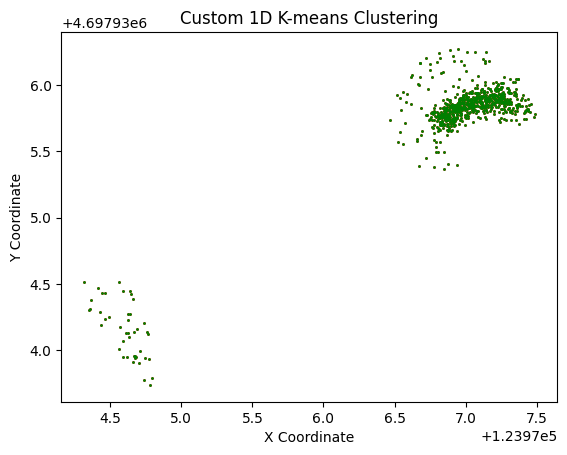

Apoyo found without errors (137, 7)
Apoyo found without errors (139, 8)
Apoyo found without errors (11, 10)
Apoyo found without errors (66, 11)
Apoyo found without errors (52, 12)
Some points are the same but not all in (115, 13)
Asociated RMSE: 2.5086372147171776
10554
(3, 3528) vs (3, 3528)


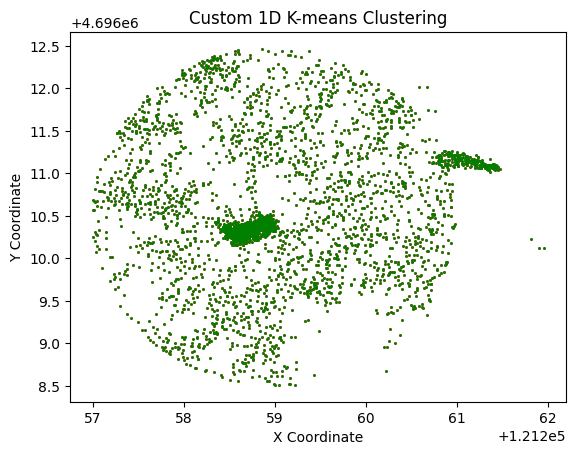

Apoyo found without errors (142, 14)
Some points are the same but not all in (68, 15)
Asociated RMSE: 1.6978646006693847
5823
(3, 2762) vs (3, 2762)


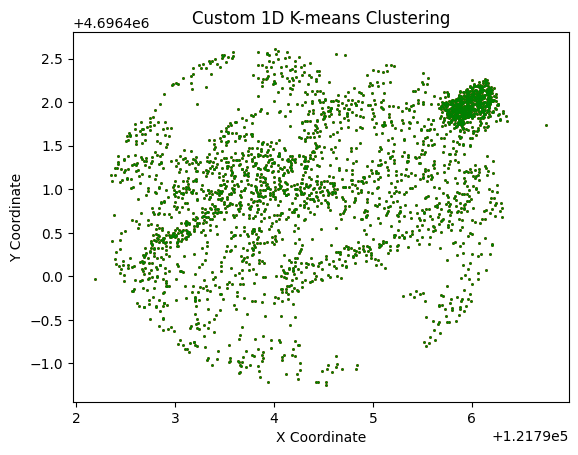

Apoyo found without errors (154, 16)
Apoyo found without errors (120, 17)
Some points are the same but not all in (123, 18)
Asociated RMSE: 2.485818908795427
7524
(3, 2534) vs (3, 2534)


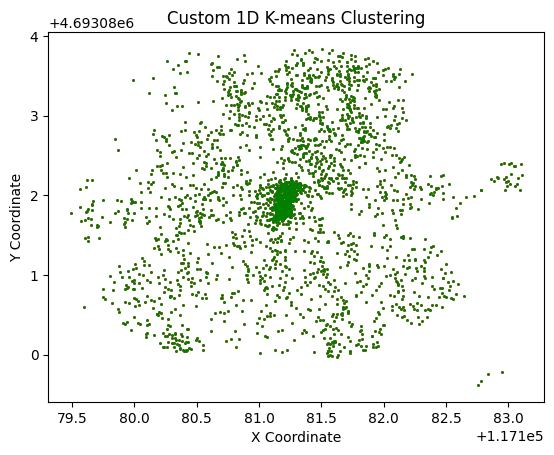

Apoyo found without errors (52, 19)
Apoyo found without errors (140, 19)
Apoyo found without errors (41, 20)
Apoyo found without errors (56, 21)
Apoyo found without errors (60, 22)
Apoyo found without errors (130, 25)
Apoyo found without errors (132, 26)
Apoyo found without errors (31, 28)
Apoyo found without errors (107, 28)
Apoyo found without errors (113, 30)
Apoyo found without errors (80, 31)
Some points are the same but not all in (66, 32)
Asociated RMSE: 2.813660005357209
3852
(3, 1289) vs (3, 1289)


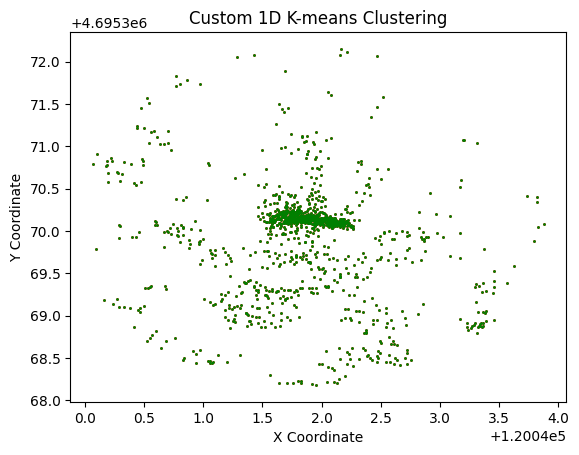

Apoyo found without errors (104, 35)
Apoyo found without errors (118, 36)
Some points are the same but not all in (83, 38)
Asociated RMSE: 2.5438647383310795
11274
(3, 3924) vs (3, 3924)


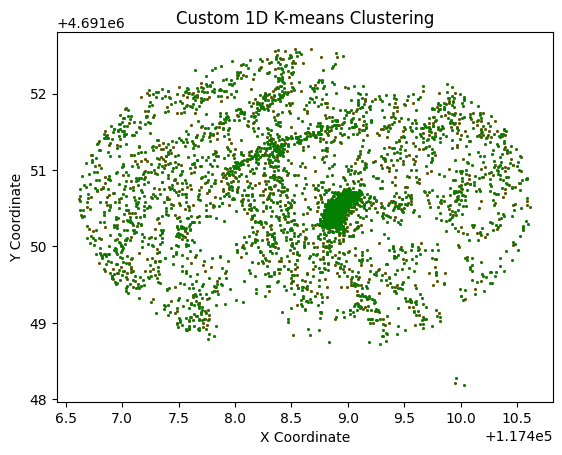

Apoyo found without errors (149, 39)
Apoyo found without errors (84, 40)
Apoyo found without errors (87, 41)
Some points are the same but not all in (134, 44)
Asociated RMSE: 2.2749038401710213
6549
(3, 3489) vs (3, 3489)


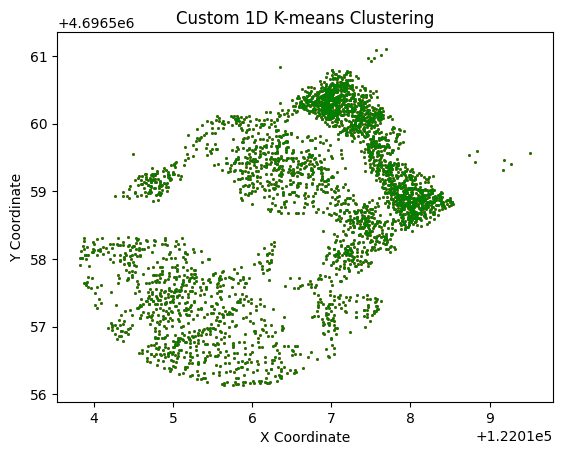

Apoyo found without errors (76, 45)
Apoyo found without errors (77, 46)
Some points are the same but not all in (99, 49)
Asociated RMSE: 1.5251528129397232
10049
(3, 3642) vs (3, 3642)


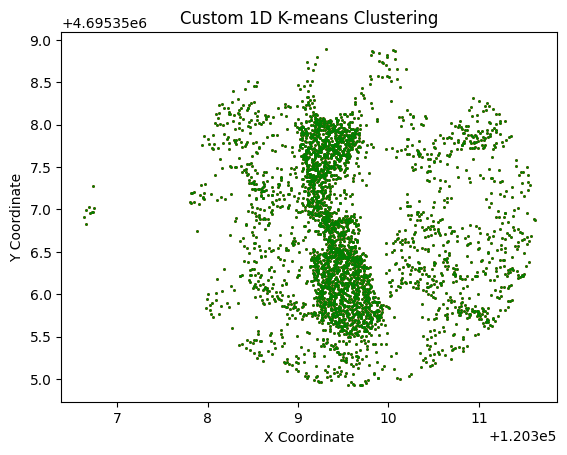

Apoyo found without errors (140, 52)
Apoyo found without errors (117, 57)
Some points are the same but not all in (124, 59)
Asociated RMSE: 2.8801773669706168
5124
(3, 1710) vs (3, 1710)


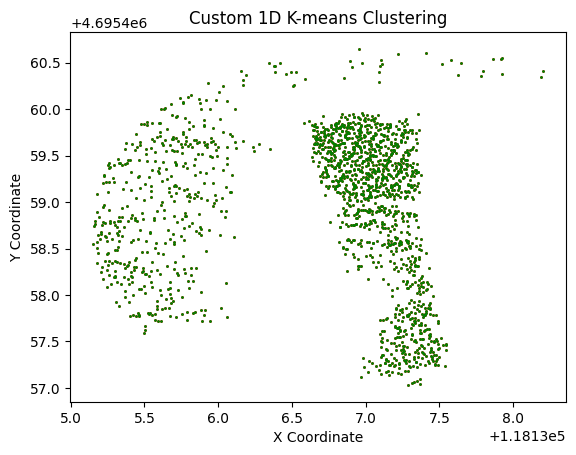

Apoyo found without errors (61, 60)
Apoyo found without errors (90, 60)
Apoyo found without errors (143, 68)
Some points are the same but not all in (81, 69)
Asociated RMSE: 2.7856532167510752
5657
(3, 1889) vs (3, 1889)


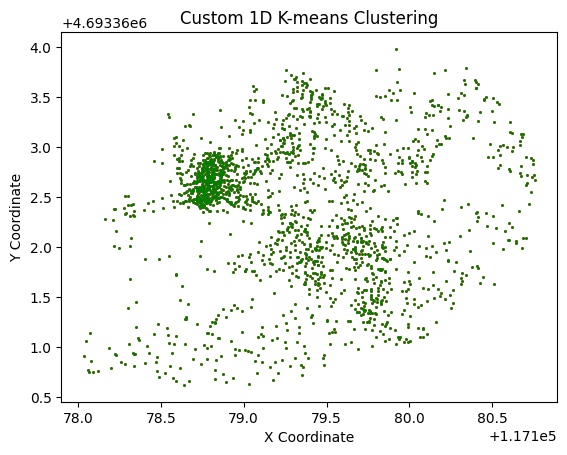

Apoyo found without errors (146, 70)
Apoyo found without errors (99, 72)
Apoyo found without errors (92, 74)
Some points are the same but not all in (131, 75)
Asociated RMSE: 2.0435530704153377
4005
(3, 1525) vs (3, 1525)


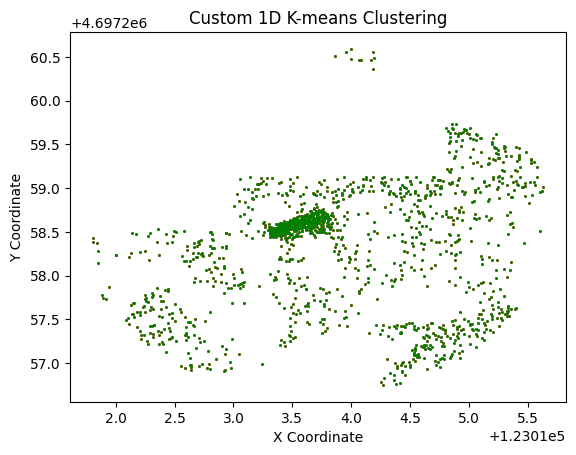

Apoyo found without errors (136, 77)
Apoyo found without errors (114, 80)
Some points are the same but not all in (128, 83)
Asociated RMSE: 2.7227732889924807
37705
(3, 12569) vs (3, 12569)


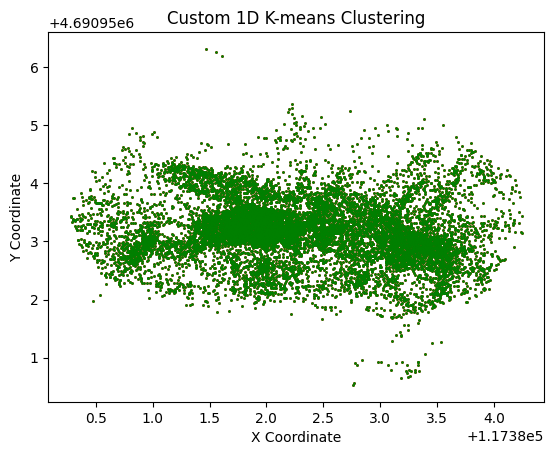

Apoyo found without errors (152, 84)
Apoyo found without errors (106, 87)
Apoyo found without errors (125, 90)
Apoyo found without errors (126, 92)
Apoyo found without errors (144, 101)
Apoyo found without errors (150, 105)
Apoyo found without errors (153, 106)
Apoyo found without errors (125, 108)
Apoyo found without errors (127, 111)
Apoyo found without errors (133, 112)
Some points are the same but not all in (122, 119)
Asociated RMSE: 2.17380658201589
21811
(3, 7274) vs (3, 7274)


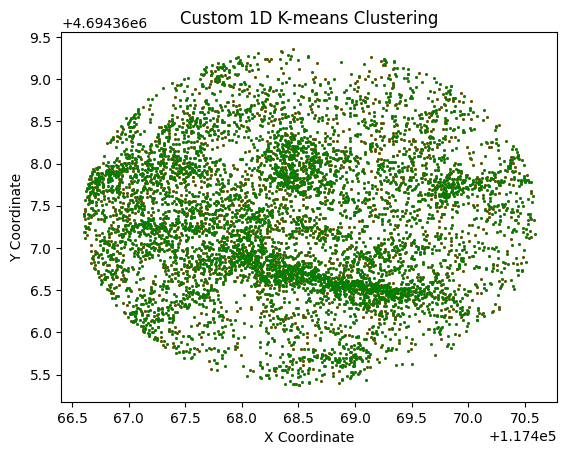

Some points are the same but not all in (148, 123)
Asociated RMSE: 2.1948991046065403
8936
(3, 2979) vs (3, 2979)


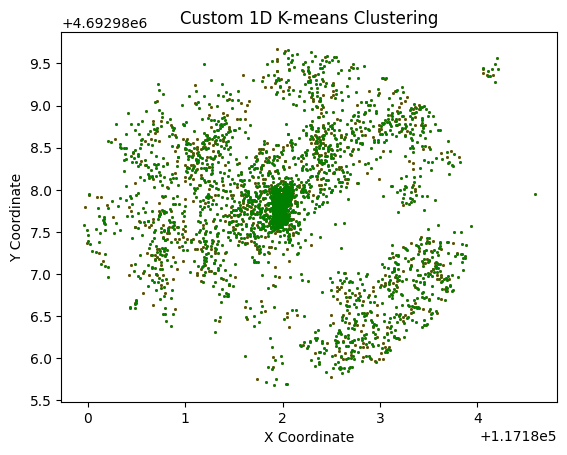

Apoyo found without errors (154, 153)


In [151]:
parejas = []
parejas_ids = []

for j in range(len(data)):

    apoyos_1 = apoyos_separados[j]

    for i in range(j,len(data)):
        
        found = False
        apoyos_2 = apoyos_separados[i]
        
                
        if i != j:
            
            if len(apoyos_1) == 1:
                print(f"El vano {j} solo tiene 1 apoyo")
                
            if len(apoyos_2) == 1:
                print(f"El vano {i} solo tiene 1 apoyo")
            
            for k in range(len(apoyos_1)):
                for h in range(len(apoyos_2)):
                    
                    points1 = apoyos_1[k]
                    points2 = apoyos_2[h]
                    
                    if found:
                        parejas.append((i,j))
                        parejas_ids.append((data[i]["ID_VANO"], data[j]["ID_VANO"]))
                        break
            
                        
                    try:

                        cond = points1 == points2
                        
                        if (cond == True).any():
                            
                            cond = (cond == False)
                            
                            if cond.sum(axis = 0).sum(axis = 0) != 0:
                                
                                rmse = np.sqrt(np.mean(np.square(points1 - points2)))
                                
                                print(f"Some points are the same but not all in {i,j}")
                                print(f"Asociated RMSE: {rmse}")
                                
                                print(cond.sum(axis = 0).sum(axis = 0))
                                print(f"{points1.shape} vs {points1.shape}")
                            
                                plt.scatter(points1[0], points1[1], c = "red", s=1)
                                plt.scatter(points2[0], points2[1], c = "green", s=1)
                                plt.title('Custom 1D K-means Clustering')
                                plt.xlabel('X Coordinate')
                                plt.ylabel('Y Coordinate')
                                plt.show()
                                
                                if rmse < 10:
                                    found = True
                                    
                                else:
                                    print(f"Pareja {i,j} not validated, rmse too big!")
                                    
                                break

                                
                            else:
                                print(f"Apoyo found without errors {i,j}")
                                found = True
                                break
                    
                    except Exception:
                        continue
                        
    if not found:
        print(f"Apoyo comun not found in {i,j}")

In [152]:
parejas

[(1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 0),
 (26, 0),
 (27, 0),
 (28, 0),
 (29, 0),
 (30, 0),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 0),
 (37, 0),
 (38, 0),
 (39, 0),
 (40, 0),
 (41, 0),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 0),
 (46, 0),
 (47, 0),
 (48, 0),
 (49, 0),
 (50, 0),
 (51, 0),
 (52, 0),
 (53, 0),
 (54, 0),
 (55, 0),
 (56, 0),
 (57, 0),
 (58, 0),
 (59, 0),
 (60, 0),
 (61, 0),
 (62, 0),
 (63, 0),
 (64, 0),
 (65, 0),
 (66, 0),
 (67, 0),
 (68, 0),
 (69, 0),
 (70, 0),
 (71, 0),
 (72, 0),
 (73, 0),
 (74, 0),
 (75, 0),
 (76, 0),
 (77, 0),
 (78, 0),
 (79, 0),
 (80, 0),
 (81, 0),
 (82, 0),
 (83, 0),
 (84, 0),
 (85, 0),
 (86, 0),
 (87, 0),
 (88, 0),
 (89, 0),
 (90, 0),
 (91, 0),
 (92, 0),
 (93, 0),
 (94, 0),
 (95, 0),
 (96, 0),
 (97, 0),
 (98, 0),
 (99, 0),
 (100, 0),
 (101, 0

In [ ]:
validated_parejas = []
bad_parejas = []

for pareja in parejas:
    
    print(f"\nProcessing pareja {pareja}")
    found = False
    
    for i in range(2):
        for j in range(2):
            
            points1 = apoyos_separados[pareja[0]][j]
            points2 = apoyos_separados[pareja[1]][i]
                
            try:

                cond = points1 == points2
                if (cond == True).any():
                    
                    cond = (cond == False)
                    
                    if cond.sum(axis = 0).sum(axis = 0) != 0:
                        
                        rmse = np.sqrt(np.mean(np.square(points1 - points2)))
                        
                        print(f"Some points are the same but not all in {pareja}")
                        print(f"Asociated RMSE: {rmse}")
                        
                        print(cond.sum(axis = 0).sum(axis = 0))
                        print(f"{points1.shape} vs {points1.shape}")
                    
                        plt.scatter(points1[0], points1[1], c = "red", s=1)
                        plt.scatter(points2[0], points2[1], c = "green", s=1)
                        plt.title('Custom 1D K-means Clustering')
                        plt.xlabel('X Coordinate')
                        plt.ylabel('Y Coordinate')
                        plt.show()

                        
                    else:
                        print(f"Apoyo found without errors {pareja}")
                    
                    if rmse < 10:
                        found = True
                    else:
                        print(f"Pareja not validated, rmse too big!")
                    break
                
            except Exception:
                continue
            
            if found:
                validated_parejas.append(pareja)
                break
            
    if not found:
        print(f"Apoyo comun not found in {pareja}")
        bad_parejas.append(pareja)

In [143]:
def buscar_parejas(num):

    return np.array(parejas)[np.where(np.array(parejas) == num)[0]]

for num in range(len(data)):
    
    print(f"Numero de conexiones de {num} {buscar_parejas(num).shape[0]}")


Numero de conexiones de 0 2
Numero de conexiones de 1 3
Numero de conexiones de 2 3
Numero de conexiones de 3 2
Numero de conexiones de 4 2
Numero de conexiones de 5 1
Numero de conexiones de 6 1
Numero de conexiones de 7 2
Numero de conexiones de 8 2
Numero de conexiones de 9 0
Numero de conexiones de 10 1
Numero de conexiones de 11 2
Numero de conexiones de 12 2
Numero de conexiones de 13 1
Numero de conexiones de 14 2
Numero de conexiones de 15 2
Numero de conexiones de 16 2
Numero de conexiones de 17 1
Numero de conexiones de 18 3
Numero de conexiones de 19 2
Numero de conexiones de 20 1
Numero de conexiones de 21 3
Numero de conexiones de 22 2
Numero de conexiones de 23 2
Numero de conexiones de 24 1
Numero de conexiones de 25 2
Numero de conexiones de 26 2
Numero de conexiones de 27 1
Numero de conexiones de 28 3
Numero de conexiones de 29 2
Numero de conexiones de 30 2
Numero de conexiones de 31 3
Numero de conexiones de 32 2
Numero de conexiones de 33 3
Numero de conexiones de 

In [144]:
points1 = apoyos_separados[63][0]
points2 = apoyos_separados[3][1]

print(points1.shape, points1.shape)

print(sum(sum((apoyos_separados[63][0] == apoyos_separados[3][1]))))

(3, 2166) (3, 2166)
711


In [118]:
np.sqrt(np.mean(np.square(points1 - points2)))

2.080669284178446

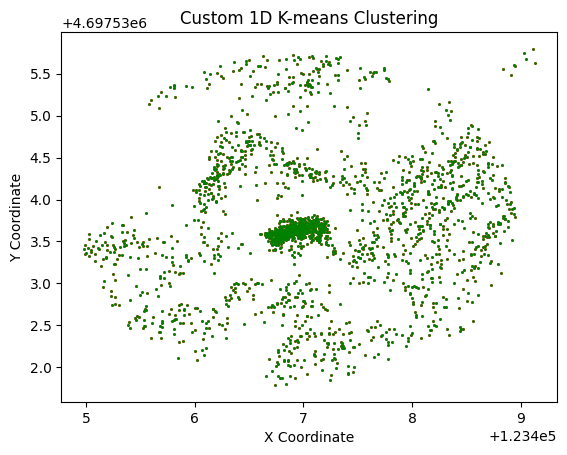

In [119]:
points1 = apoyos_separados[63][0]
points2 = apoyos_separados[3][1]

plt.scatter(points1[0], points1[1], c = "red", s=1)
plt.scatter(points2[0], points2[1], c = "green", s=1)
plt.title('Custom 1D K-means Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


In [136]:
apoyos_separados.keys()

dict_keys([32, 59, 109, 121, 122, 147])


Processing pareja (62, 0)
Apoyo found without errors (62, 0)

Processing pareja (91, 0)
Apoyo found without errors (91, 0)

Processing pareja (2, 1)
Apoyo found without errors (2, 1)

Processing pareja (75, 1)
Apoyo found without errors (75, 1)

Processing pareja (85, 1)
Apoyo found without errors (85, 1)

Processing pareja (3, 2)
Apoyo found without errors (3, 2)

Processing pareja (85, 2)
Apoyo found without errors (85, 2)

Processing pareja (63, 3)
Some points are the same but not all in (63, 3)
Asociated RMSE: 2.080669284178446
5787
(3, 2166) vs (3, 2166)


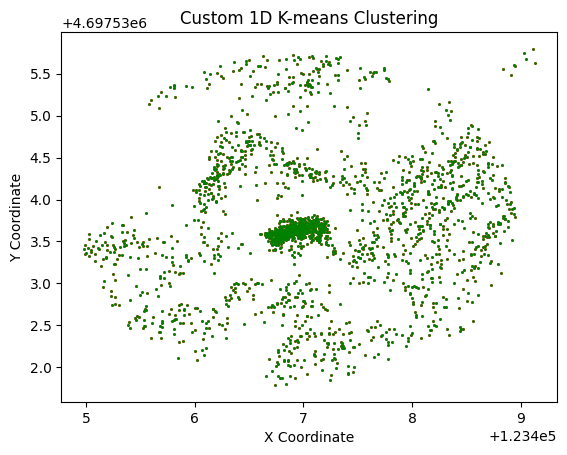


Processing pareja (86, 4)
Apoyo found without errors (86, 4)

Processing pareja (112, 4)
Some points are the same but not all in (112, 4)
Asociated RMSE: 0.9971613238340712
432
(3, 767) vs (3, 767)


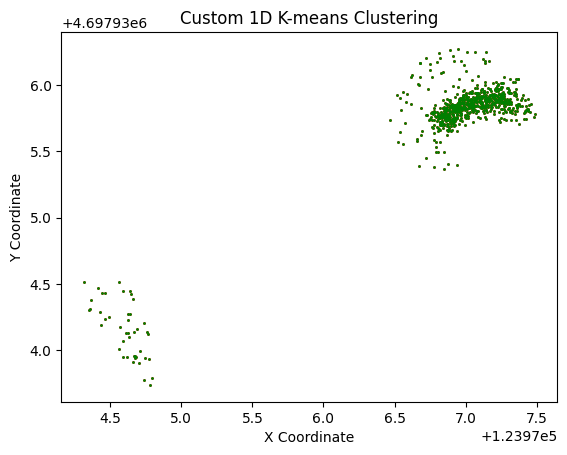


Processing pareja (134, 5)
Apoyo found without errors (134, 5)

Processing pareja (135, 6)
Apoyo found without errors (135, 6)

Processing pareja (29, 7)
Apoyo found without errors (29, 7)

Processing pareja (137, 7)
Apoyo found without errors (137, 7)

Processing pareja (79, 8)
Apoyo found without errors (79, 8)

Processing pareja (139, 8)
Apoyo found without errors (139, 8)

Processing pareja (11, 10)
Apoyo found without errors (11, 10)

Processing pareja (66, 11)
Apoyo found without errors (66, 11)

Processing pareja (52, 12)
Apoyo found without errors (52, 12)

Processing pareja (141, 12)
Apoyo found without errors (141, 12)

Processing pareja (115, 13)
Some points are the same but not all in (115, 13)
Asociated RMSE: 2.5086372147171776
10554
(3, 3528) vs (3, 3528)


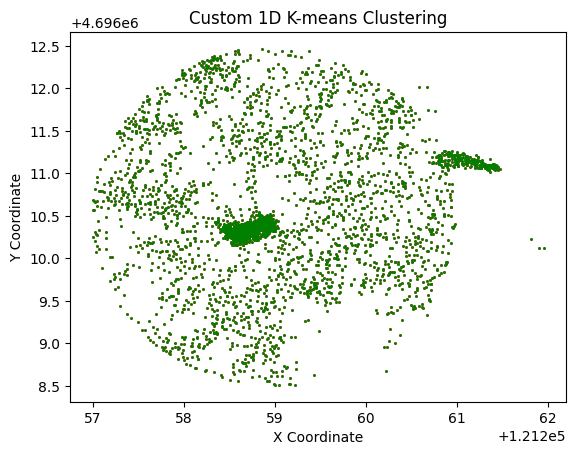


Processing pareja (142, 14)
Apoyo found without errors (142, 14)

Processing pareja (143, 14)
Apoyo found without errors (143, 14)

Processing pareja (33, 15)
Some points are the same but not all in (33, 15)
Asociated RMSE: 2.3694530506619627
7380
(3, 2708) vs (3, 2708)


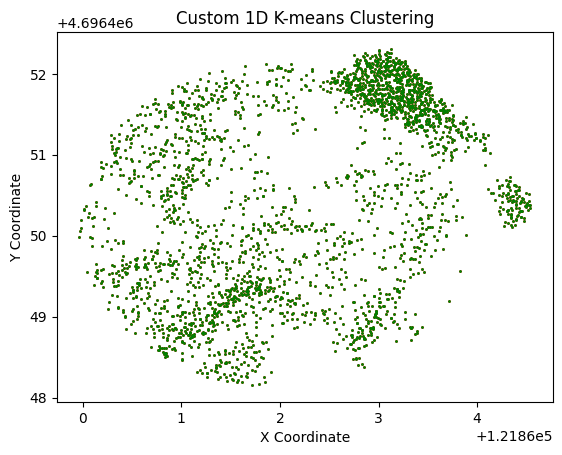


Processing pareja (68, 15)
Some points are the same but not all in (68, 15)
Asociated RMSE: 1.6978646006693847
5823
(3, 2762) vs (3, 2762)


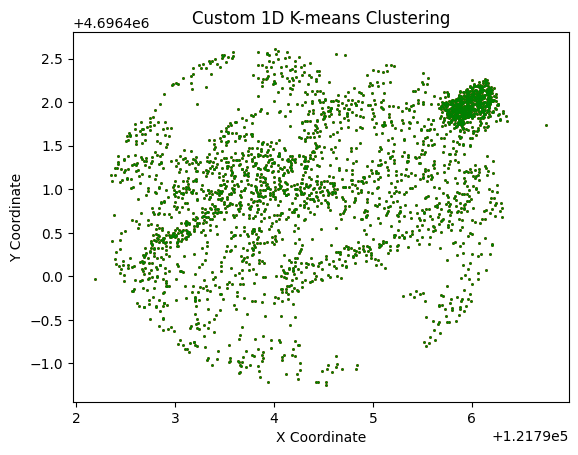


Processing pareja (34, 16)
Apoyo comun not found in (34, 16)

Processing pareja (154, 16)
Apoyo found without errors (154, 16)

Processing pareja (120, 17)
Apoyo found without errors (120, 17)

Processing pareja (37, 18)
Apoyo comun not found in (37, 18)

Processing pareja (123, 18)
Some points are the same but not all in (123, 18)
Asociated RMSE: 2.485818908795427
7524
(3, 2534) vs (3, 2534)


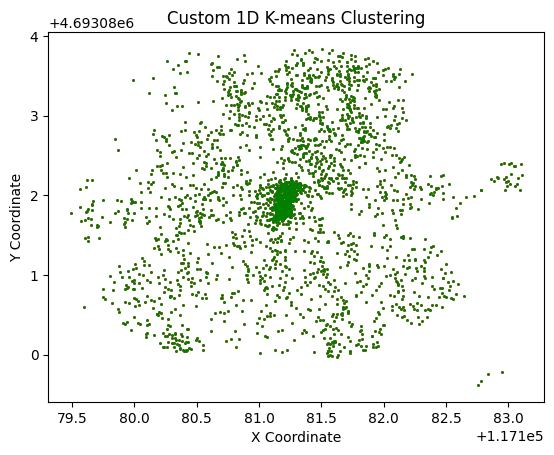


Processing pareja (145, 18)
Apoyo comun not found in (145, 18)

Processing pareja (52, 19)
Apoyo found without errors (52, 19)

Processing pareja (140, 19)
Apoyo found without errors (140, 19)

Processing pareja (41, 20)
Apoyo found without errors (41, 20)

Processing pareja (56, 21)
Apoyo found without errors (56, 21)

Processing pareja (153, 21)
Apoyo found without errors (153, 21)

Processing pareja (154, 21)
Apoyo found without errors (154, 21)

Processing pareja (23, 22)
Apoyo comun not found in (23, 22)

Processing pareja (60, 22)
Apoyo found without errors (60, 22)

Processing pareja (42, 23)
Some points are the same but not all in (42, 23)
Asociated RMSE: 1.4800789388181825
3048
(3, 1476) vs (3, 1476)


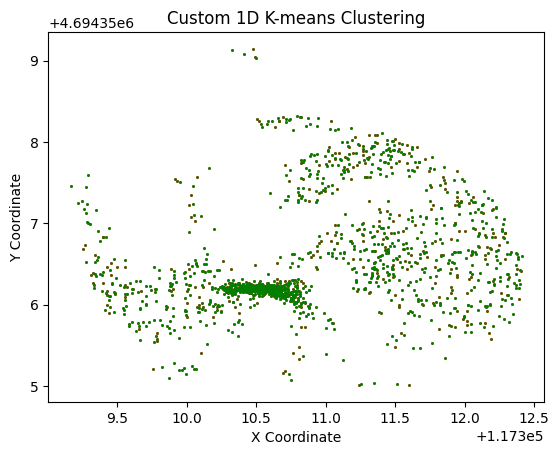


Processing pareja (61, 24)
Apoyo found without errors (61, 24)

Processing pareja (93, 25)
Apoyo found without errors (93, 25)

Processing pareja (130, 25)
Apoyo found without errors (130, 25)

Processing pareja (43, 26)
Apoyo found without errors (43, 26)

Processing pareja (132, 26)
Apoyo found without errors (132, 26)

Processing pareja (97, 27)
Apoyo found without errors (97, 27)

Processing pareja (31, 28)
Apoyo found without errors (31, 28)

Processing pareja (107, 28)
Apoyo found without errors (107, 28)

Processing pareja (137, 28)
Apoyo found without errors (137, 28)

Processing pareja (138, 29)
Apoyo found without errors (138, 29)

Processing pareja (48, 30)
Apoyo found without errors (48, 30)

Processing pareja (113, 30)
Apoyo found without errors (113, 30)

Processing pareja (80, 31)
Apoyo found without errors (80, 31)

Processing pareja (107, 31)
Apoyo found without errors (107, 31)

Processing pareja (66, 32)
Some points are the same but not all in (66, 32)
Asociated RMS

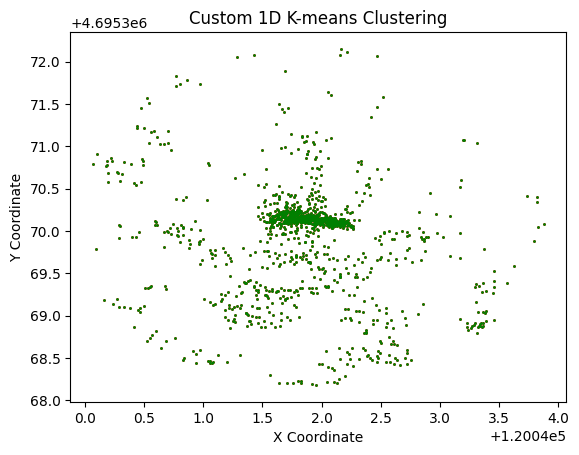


Processing pareja (72, 32)
Some points are the same but not all in (72, 32)
Asociated RMSE: 2.5853532801015513
6291
(3, 2103) vs (3, 2103)


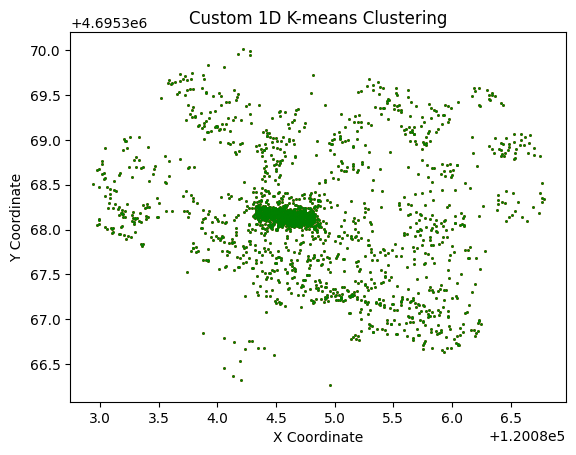


Processing pareja (44, 33)
Some points are the same but not all in (44, 33)
Asociated RMSE: 2.2749038401710213
6549
(3, 3489) vs (3, 3489)


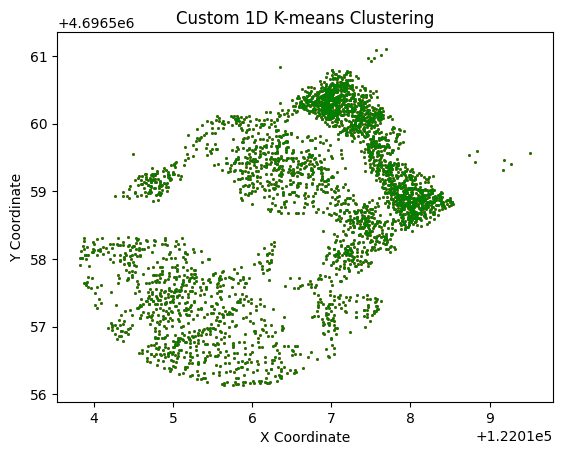


Processing pareja (134, 33)
Apoyo found without errors (134, 33)

Processing pareja (53, 34)
Apoyo found without errors (53, 34)

Processing pareja (104, 35)
Apoyo found without errors (104, 35)

Processing pareja (146, 35)
Apoyo found without errors (146, 35)

Processing pareja (118, 36)
Apoyo found without errors (118, 36)

Processing pareja (119, 36)
Some points are the same but not all in (119, 36)
Asociated RMSE: 2.142761963929952
19878
(3, 7274) vs (3, 7274)


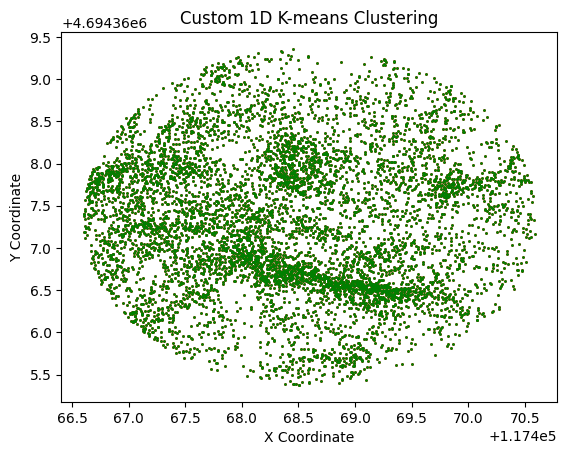


Processing pareja (122, 36)
Some points are the same but not all in (122, 36)
Asociated RMSE: 2.1908116399898376
21618
(3, 7274) vs (3, 7274)


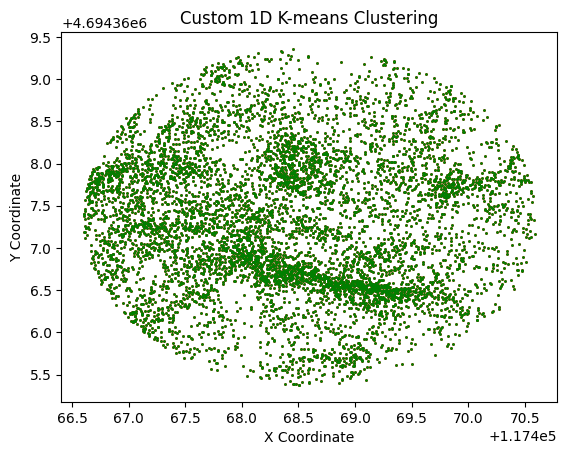


Processing pareja (145, 37)
Apoyo comun not found in (145, 37)

Processing pareja (147, 37)
Apoyo comun not found in (147, 37)

Processing pareja (83, 38)
Some points are the same but not all in (83, 38)
Asociated RMSE: 2.5438647383310795
11274
(3, 3924) vs (3, 3924)


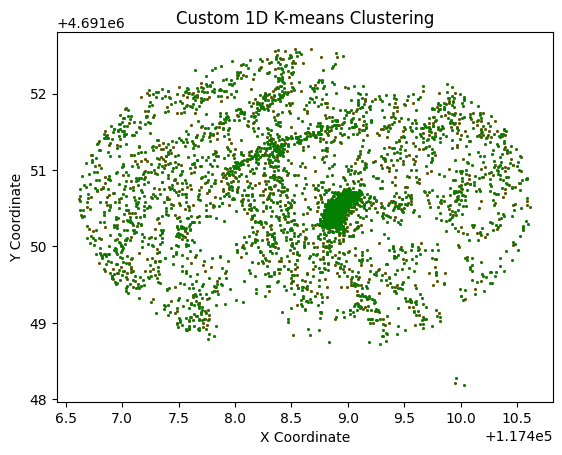


Processing pareja (149, 38)
Apoyo found without errors (149, 38)

Processing pareja (149, 39)
Apoyo found without errors (149, 39)

Processing pareja (150, 39)
Apoyo found without errors (150, 39)

Processing pareja (55, 40)
Apoyo found without errors (55, 40)

Processing pareja (84, 40)
Apoyo found without errors (84, 40)

Processing pareja (113, 40)
Apoyo comun not found in (113, 40)

Processing pareja (87, 41)
Apoyo found without errors (87, 41)

Processing pareja (89, 42)
Apoyo comun not found in (89, 42)

Processing pareja (133, 43)
Some points are the same but not all in (133, 43)
Asociated RMSE: 1.615573343800025
5142
(3, 3154) vs (3, 3154)


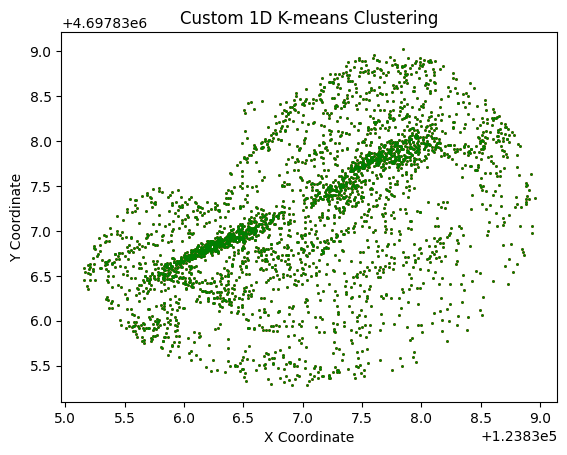


Processing pareja (134, 44)
Some points are the same but not all in (134, 44)
Asociated RMSE: 2.2749038401710213
6549
(3, 3489) vs (3, 3489)


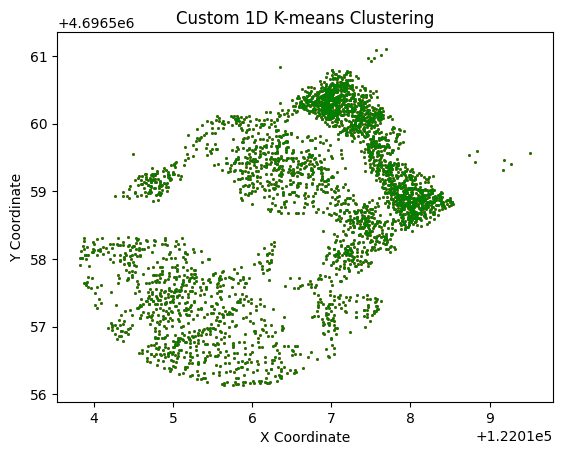


Processing pareja (76, 45)
Apoyo found without errors (76, 45)

Processing pareja (77, 46)
Apoyo found without errors (77, 46)

Processing pareja (65, 48)
Apoyo found without errors (65, 48)

Processing pareja (50, 49)
Some points are the same but not all in (50, 49)
Asociated RMSE: 2.901784471449794
16811
(3, 6064) vs (3, 6064)


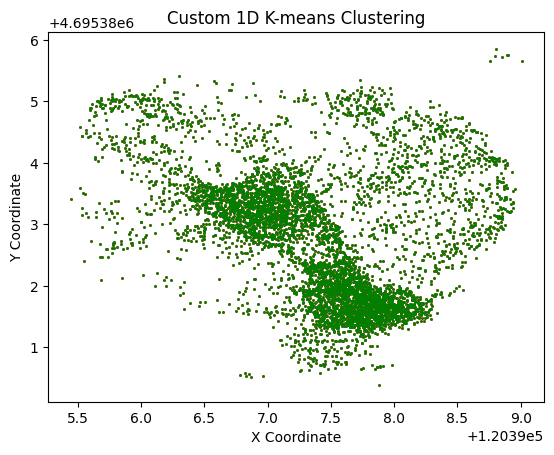


Processing pareja (99, 49)
Some points are the same but not all in (99, 49)
Asociated RMSE: 1.5251528129397232
10049
(3, 3642) vs (3, 3642)


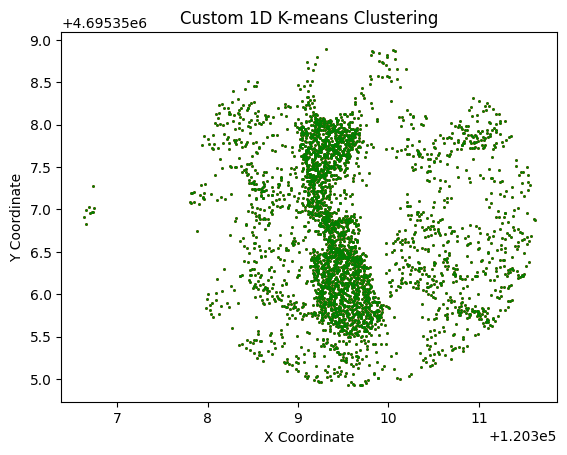


Processing pareja (51, 50)
Apoyo found without errors (51, 50)

Processing pareja (100, 51)
Some points are the same but not all in (100, 51)
Asociated RMSE: 2.8058515645314674
3383
(3, 1128) vs (3, 1128)


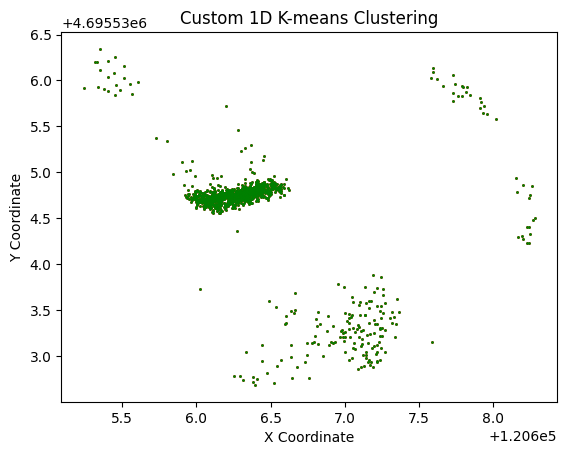


Processing pareja (140, 52)
Apoyo found without errors (140, 52)

Processing pareja (144, 53)
Apoyo found without errors (144, 53)

Processing pareja (121, 54)
Apoyo comun not found in (121, 54)

Processing pareja (148, 54)
Apoyo comun not found in (148, 54)

Processing pareja (82, 57)
Apoyo found without errors (82, 57)

Processing pareja (117, 57)
Apoyo found without errors (117, 57)

Processing pareja (116, 58)
Apoyo found without errors (116, 58)

Processing pareja (124, 58)
Apoyo found without errors (124, 58)

Processing pareja (124, 59)
Some points are the same but not all in (124, 59)
Asociated RMSE: 2.8801773669706168
5124
(3, 1710) vs (3, 1710)


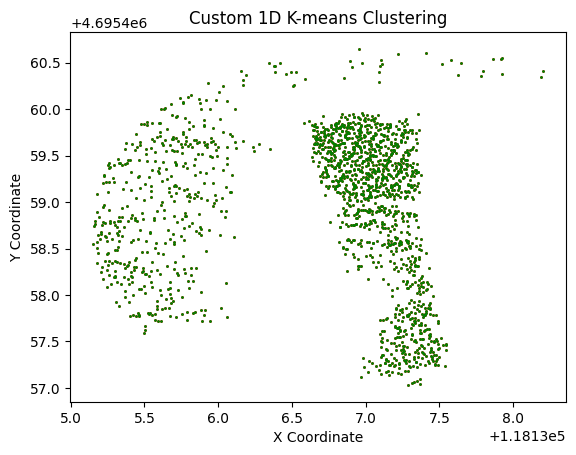


Processing pareja (61, 60)
Apoyo found without errors (61, 60)

Processing pareja (90, 60)
Apoyo found without errors (90, 60)

Processing pareja (90, 61)
Apoyo found without errors (90, 61)

Processing pareja (132, 63)
Apoyo found without errors (132, 63)

Processing pareja (135, 64)
Apoyo comun not found in (135, 64)

Processing pareja (136, 64)
Apoyo found without errors (136, 64)

Processing pareja (78, 65)
Apoyo found without errors (78, 65)

Processing pareja (115, 67)
Apoyo comun not found in (115, 67)

Processing pareja (141, 67)
Apoyo comun not found in (141, 67)

Processing pareja (143, 68)
Apoyo found without errors (143, 68)

Processing pareja (81, 69)
Some points are the same but not all in (81, 69)
Asociated RMSE: 2.7856532167510752
5657
(3, 1889) vs (3, 1889)


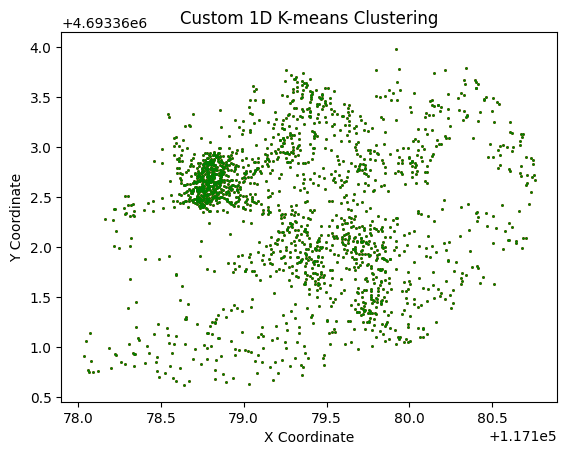


Processing pareja (88, 69)
Some points are the same but not all in (88, 69)
Asociated RMSE: 2.5628298206441644
9893
(3, 3299) vs (3, 3299)


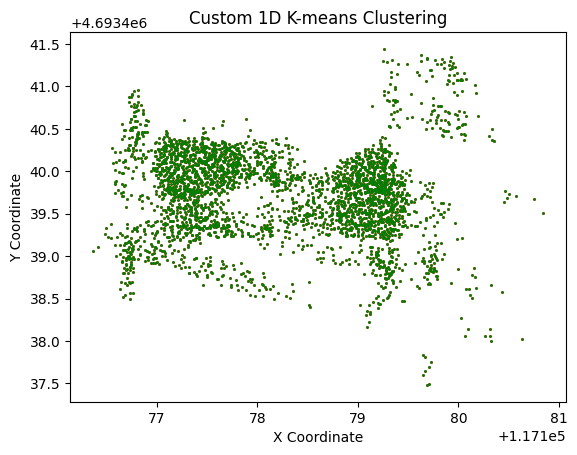


Processing pareja (103, 69)
Some points are the same but not all in (103, 69)
Asociated RMSE: 2.598544288536289
9849
(3, 3299) vs (3, 3299)


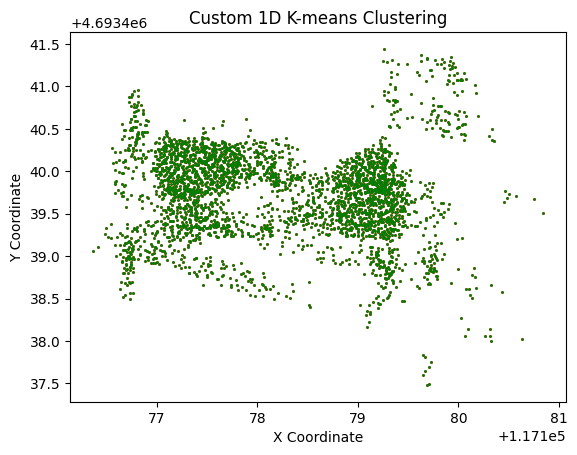


Processing pareja (118, 70)
Apoyo comun not found in (118, 70)

Processing pareja (146, 70)
Apoyo found without errors (146, 70)

Processing pareja (99, 72)
Apoyo found without errors (99, 72)

Processing pareja (92, 74)
Apoyo found without errors (92, 74)

Processing pareja (109, 74)
Apoyo comun not found in (109, 74)

Processing pareja (127, 74)
Apoyo found without errors (127, 74)

Processing pareja (131, 75)
Some points are the same but not all in (131, 75)
Asociated RMSE: 2.0435530704153377
4005
(3, 1525) vs (3, 1525)


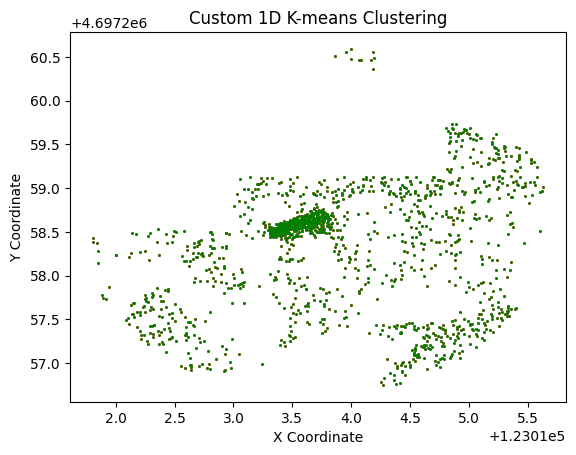


Processing pareja (136, 77)
Apoyo found without errors (136, 77)

Processing pareja (139, 78)
Apoyo found without errors (139, 78)

Processing pareja (114, 79)
Apoyo comun not found in (114, 79)

Processing pareja (114, 80)
Apoyo found without errors (114, 80)

Processing pareja (145, 81)
Apoyo comun not found in (145, 81)

Processing pareja (104, 82)
Apoyo found without errors (104, 82)

Processing pareja (128, 83)
Some points are the same but not all in (128, 83)
Asociated RMSE: 2.7227732889924807
37705
(3, 12569) vs (3, 12569)


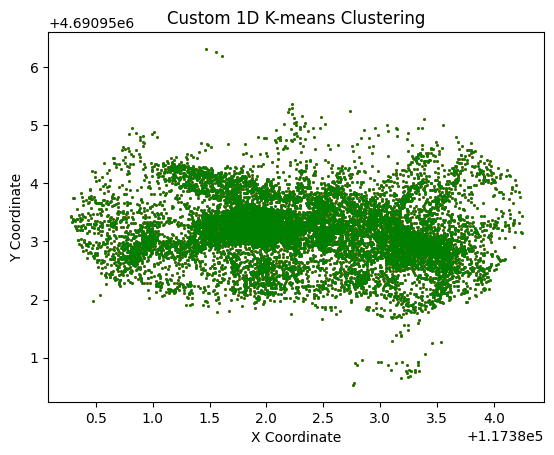


Processing pareja (113, 84)
Apoyo comun not found in (113, 84)

Processing pareja (152, 84)
Apoyo found without errors (152, 84)

Processing pareja (96, 86)
Apoyo found without errors (96, 86)

Processing pareja (106, 87)
Apoyo found without errors (106, 87)

Processing pareja (103, 88)
Some points are the same but not all in (103, 88)
Asociated RMSE: 2.6609962860508456
9893
(3, 3299) vs (3, 3299)


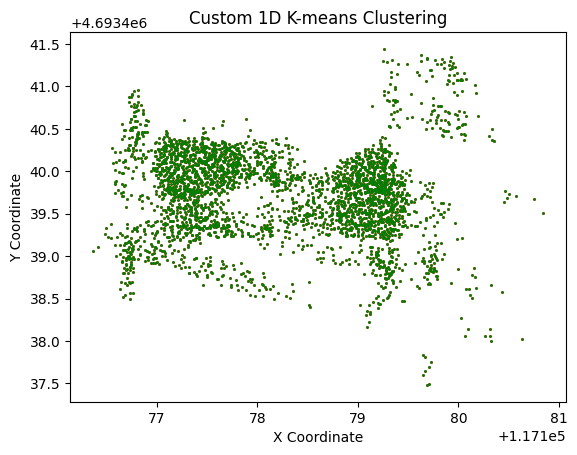


Processing pareja (122, 89)
Apoyo comun not found in (122, 89)

Processing pareja (125, 90)
Apoyo found without errors (125, 90)

Processing pareja (110, 91)
Apoyo found without errors (110, 91)

Processing pareja (126, 92)
Apoyo found without errors (126, 92)

Processing pareja (94, 93)
Apoyo found without errors (94, 93)

Processing pareja (95, 94)
Some points are the same but not all in (95, 94)
Asociated RMSE: 2.457514639900803
2517
(3, 897) vs (3, 897)


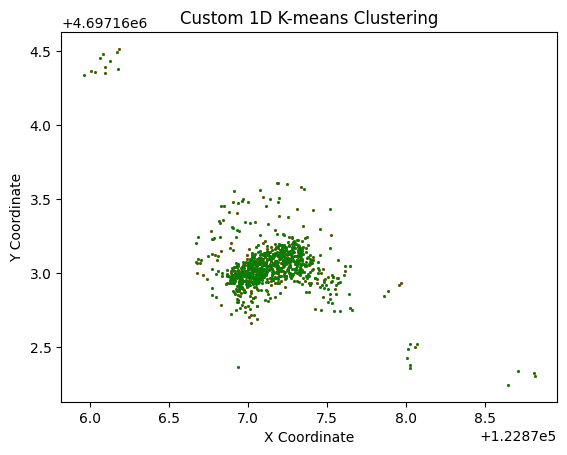


Processing pareja (131, 95)
Some points are the same but not all in (131, 95)
Asociated RMSE: 2.3848106480607667
2064
(3, 710) vs (3, 710)


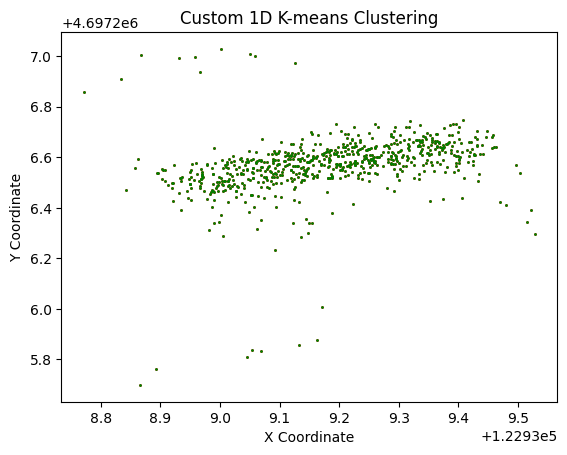


Processing pareja (98, 97)
Apoyo comun not found in (98, 97)

Processing pareja (140, 100)
Apoyo found without errors (140, 100)

Processing pareja (144, 101)
Apoyo found without errors (144, 101)

Processing pareja (116, 102)
Some points are the same but not all in (116, 102)
Asociated RMSE: 3.0783108688434124
15267
(3, 5162) vs (3, 5162)


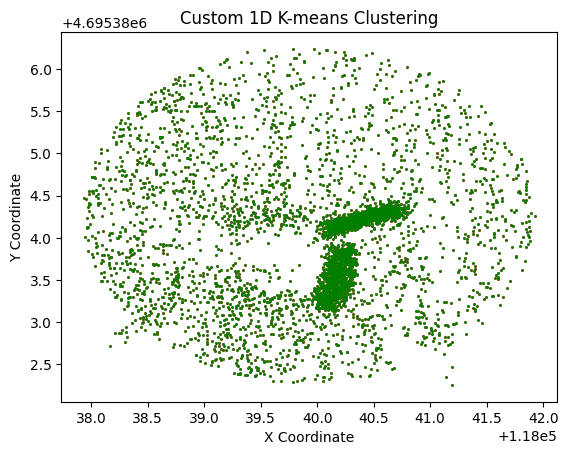


Processing pareja (117, 103)
Some points are the same but not all in (117, 103)
Asociated RMSE: 1.8975439824555445
8181
(3, 2743) vs (3, 2743)


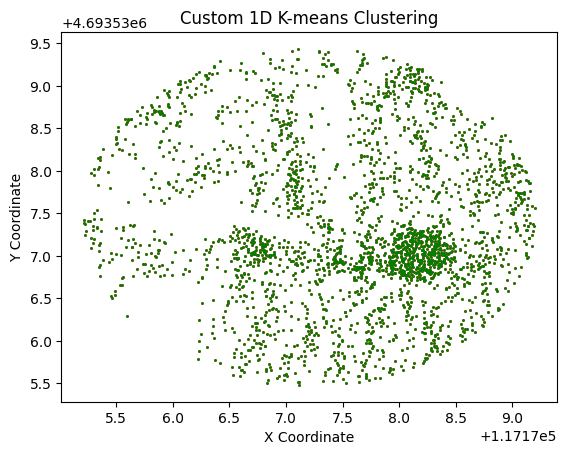


Processing pareja (150, 105)
Apoyo found without errors (150, 105)

Processing pareja (151, 105)
Apoyo found without errors (151, 105)

Processing pareja (153, 106)
Apoyo found without errors (153, 106)

Processing pareja (125, 108)
Apoyo found without errors (125, 108)

Processing pareja (127, 109)
Apoyo comun not found in (127, 109)

Processing pareja (126, 110)
Apoyo found without errors (126, 110)

Processing pareja (127, 111)
Apoyo found without errors (127, 111)

Processing pareja (133, 112)
Apoyo found without errors (133, 112)

Processing pareja (124, 116)
Apoyo found without errors (124, 116)

Processing pareja (120, 119)
Apoyo found without errors (120, 119)

Processing pareja (122, 119)
Some points are the same but not all in (122, 119)
Asociated RMSE: 2.17380658201589
21811
(3, 7274) vs (3, 7274)


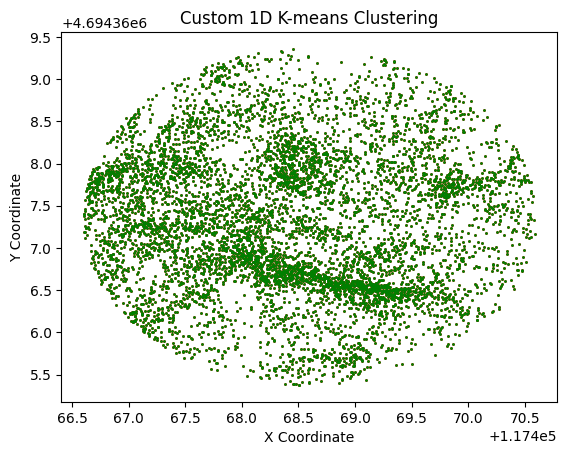


Processing pareja (148, 123)
Some points are the same but not all in (148, 123)
Asociated RMSE: 2.1948991046065403
8936
(3, 2979) vs (3, 2979)


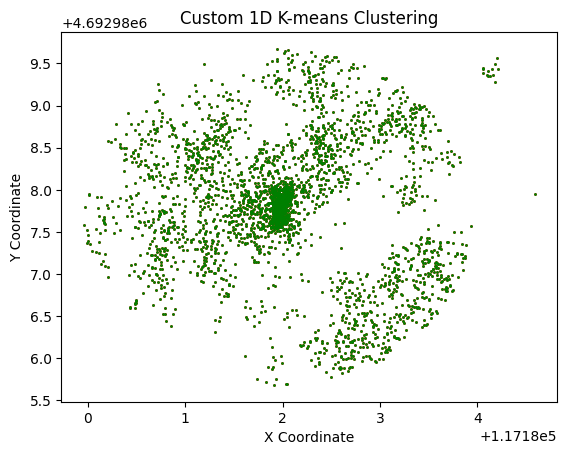


Processing pareja (130, 129)
Apoyo found without errors (130, 129)

Processing pareja (152, 151)
Apoyo found without errors (152, 151)

Processing pareja (154, 153)
Apoyo found without errors (154, 153)


In [145]:
validated_parejas = []
bad_parejas = []

for pareja in parejas:
    
    print(f"\nProcessing pareja {pareja}")
    found = False
    
    for i in range(2):
        for j in range(2):
            
            points1 = apoyos_separados[pareja[0]][j]
            points2 = apoyos_separados[pareja[1]][i]
                
            try:

                cond = points1 == points2
                if (cond == True).any():
                    
                    cond = (cond == False)
                    
                    if cond.sum(axis = 0).sum(axis = 0) != 0:
                        
                        rmse = np.sqrt(np.mean(np.square(points1 - points2)))
                        
                        print(f"Some points are the same but not all in {pareja}")
                        print(f"Asociated RMSE: {rmse}")
                        
                        print(cond.sum(axis = 0).sum(axis = 0))
                        print(f"{points1.shape} vs {points1.shape}")
                    
                        plt.scatter(points1[0], points1[1], c = "red", s=1)
                        plt.scatter(points2[0], points2[1], c = "green", s=1)
                        plt.title('Custom 1D K-means Clustering')
                        plt.xlabel('X Coordinate')
                        plt.ylabel('Y Coordinate')
                        plt.show()

                        
                    else:
                        print(f"Apoyo found without errors {pareja}")
                    
                    if rmse < 10:
                        found = True
                    else:
                        print(f"Pareja not validated, rmse too big!")
                    break
                
            except Exception:
                continue
            
            if found:
                validated_parejas.append(pareja)
                break
            
    if not found:
        print(f"Apoyo comun not found in {pareja}")
        bad_parejas.append(pareja)
    

In [125]:
apoyos_separados.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154])

In [37]:
print(extremos_values[0][0], extremos_values[1][0], extremos_values[2][0])
print(extremos_values[0][2], extremos_values[1][2], extremos_values[2][2])

118131.59109999985 4693693.3301 597.4324999999953
118138.65770000033 4693707.1072 598.619399999996


In [38]:
distancia(first_extremos[0], first_extremos[1])

NameError: name 'distancia' is not defined

In [ ]:
def distancia(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

all_vecinos_cercanos = []

for extremo1 in first_extremos:
    
    sorted_vecinos = sorted(first_extremos, key=lambda x: distancia(x, extremo1), reverse=False)
    
    # eliminamos el primero porque es él mismo
    vecinos_cercanos = sorted_vecinos[1:6]
        
    # print(sorted_vecinos, "\n", distancia(sorted_vecinos[0], extremo1))
    
    all_vecinos_cercanos.append(vecinos_cercanos)
    
all_vecinos_cercanos[0]

[array([1.17007239e+05, 4.68939176e+06, 5.51175900e+02]),
 array([1.17045151e+05, 4.68955082e+06, 5.42361100e+02]),
 array([1.17062209e+05, 4.68962258e+06, 5.43063200e+02]),
 array([1.17079453e+05, 4.68969512e+06, 5.43428400e+02]),
 array([1.17107596e+05, 4.68981417e+06, 5.43882300e+02])]

In [ ]:
dx = (extremos[0][0]-extremos[2][0])
dy = (extremos[0][1]-extremos[2][1])

In [ ]:
np.sqrt((extremos[0][0]-extremos[2][0])**2 + (extremos[0][1]-extremos[2][1])**2)

112.70424643956059